# <font color='blue'>Chapter 10. Z Transform</font>

## <font color='blue'>Problem</font>

### Unstable system
https://www.youtube.com/watch?v=XggxeuFDaDU
https://www.simscale.com/blog/2018/07/tacoma-narrows-bridge-collapse/

### Stable or not
https://www.youtube.com/watch?v=p9qrHdPEe28
    
### Laplace transform
https://www.youtube.com/watch?v=6MXMDrs6ZmA&list=RDCMUCJ0yBou72Lz9fqeMXh9mkog&index=4
    
### e to the pi i for dummies
https://www.youtube.com/watch?v=-dhHrg-KbJ0

### <font color='green'>Next: FIR Filter</font>

## <font color='blue'>Introduction to Z-transform</font>

For a signal x(t), after sampling by a impulse function $\delta (t)$ we have
\begin{equation}
x(t)\delta (t) = \sum_{n=-\infty}^{\infty} x[nT] \delta (t-nT)     
\end{equation} 

Then, let $s = \sigma + j \omega$ and $t>0$

\begin{equation}
\begin{split}
X(s) &= F\{ x(t)\}=\int_{0}^{\infty} x(t)e^{-st} dt \\
     &= \int_{0}^{\infty} \sum_{n=0}^{\infty} x[nT] \delta (t-nT) e^{-st} dt
     &= \sum_{n=0}^{\infty} x[nT]  e^{-snT}
\end{split}
\end{equation} 

Let $z = e^{sT}$ and $T=1$, then we have
\begin{equation}
X(z)= \sum_{n=0}^{\infty}x[n]z^{-n}   
\end{equation}

As we know, $ e^{snT} = e^{(\sigma + j\omega)nT}$, then we have

\begin{equation}
e^{snT} = e^{\sigma nT} \cdot e^{j\omega nT}  
\end{equation}
where $e^{\sigma nT}$ is a constant (A) when T is constant.

Hence,  
\begin{equation}
e^{snT} = A \cdot [\cos (\omega nT) + j\sin(\omega nT)]  
\end{equation}

Try to plot the graph! <br>

Assume $A=1$, it means given a unit circle.
\begin{equation}
e^{\omega} = \cos (\omega) + j\sin(\omega)  
\end{equation}

where $nT=1$. Try to plot it! <br>

###  <font color='green'>  An explanation of the Z transform part 1 </font>
https://www.youtube.com/watch?v=B4IyRw1zvvA

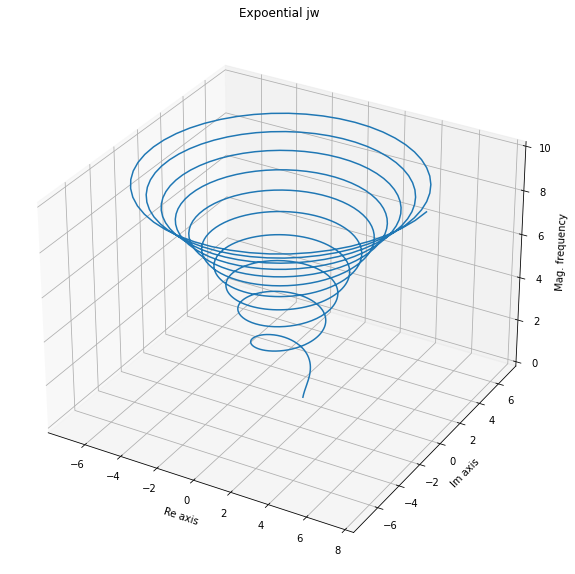

In [3]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = 10,10
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
N = 1000   # in points
t = 10    # in sec
n = np.linspace(0, t, N)

T = 0.1    # 
sigma = 2  # [-2, 0, 2]
f = np.linspace(0, 10, N)

R = np.exp(sigma*n*T)*np.cos(2* np.pi *f * n * T)
I = np.exp(sigma*n*T)*np.sin(2* np.pi *f * n * T)

ax.set_title("Expoential jw")
ax.set_xlabel('Re axis')
ax.set_ylabel('Im axis')
ax.set_zlabel('Mag. frequency ')
ax.plot(R, I, f)

plt.show()

Definition: Given a discret seqence $x[n]$, then the z can be defined as follows.

\begin{equation}
X(z)=Z\{ x[n] \} = \sum_{n=-\infty}^{\infty}x[n]z^{-n}   
\end{equation} 

The Inverse z Transform can be defined as follows.

\begin{equation}
x[n]=Z^{-1}\{ X(z) \} = \frac{1}{2\pi j}\int_{c} X(z)z^{n-1}dz   
\end{equation} 

where, $C$ is an anti-clock close path in the region of convergence (ROC) including origins.

<div>
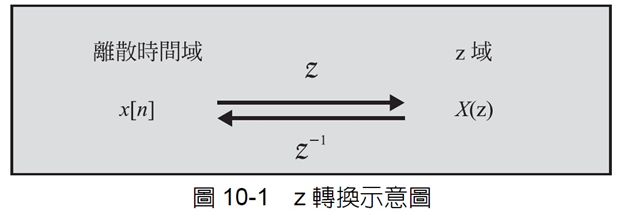
</div>

Compared with DTFT, <br>

\begin{equation}
X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] e^{-j\omega n}    
\end{equation}  
That is 
\begin{equation}
z = e^{j\omega}    
\end{equation} 

#### 收斂區域(Region of Convergence, ROC)
是指使得z轉換收斂的複數平面上的z點集合，定義如下：
 
\begin{equation}
ROC = \sum_{n=-\infty}^{\infty}x[n]z^{-n}   
\end{equation} 

其中，C是包含原點的逆時針封閉路徑，落在收斂區域內。
http://homepage.ntu.edu.tw/~fengli/Teaching/SignalsSystems/PDF/Y15-7-1_2.pdf

#### ROC 為圓環 ring 或圓盤 disk，其中心為原點。
ROC 包含單位圓，則離散時間傅立葉轉換為收斂。 <br>
ROC 不可包含任何極點。<br>
有限長度訊號之 ROC 為整個 z 平面。<br>
右邊訊號的 ROC 從離原點最遠的有限極點延伸至 $\infty$。<br>
左邊訊號的 ROC 從離原點最近的有限極點延伸至原點。<br>
雙邊訊號的 ROC 只能是圓環<br>
ROC 為一連通區域。<br>

## <font color='blue'>Examples of Z-transform </font>

### Example 1.
Given a unit impule function $\delta[n]$, please find its z-transform and ROC. <br>

\begin{equation}
X(z)=Z\{ \delta[n] \} = \sum_{n=-\infty}^{\infty}\delta[n]z^{-n} = \delta[0] \cdot z^{-0}=1
\end{equation}
ROC is all z.

### Example 2.
Given a unit function $u[n]$, please find its z-transform and ROC. <br>

\begin{equation}
X(z)=Z\{ u[n] \} = \sum_{n=0}^{\infty}u[n]z^{-n} = \sum_{n=0}^{\infty}z^{-n} =\frac{1}{1-z^{-1}}
\end{equation}
ROC: $|z^{-1}|<1$ or $|z|>1$.

### Example 3.
Given a discrete sigal function $x[n]={1,2,4,3,2,1}, n=0,1,...,5$, please find its z-transform and ROC. <br>

\begin{equation}
X(z)=Z\{ x[n] \} = \sum_{n=-\infty}^{\infty}u[n]z^{-n} = 1+2z^{-1}+4z^{-2}+3z^{-3}+2z^{-4}+z^{-5}
\end{equation}
ROC: all z, $z \neq 0$

<div>
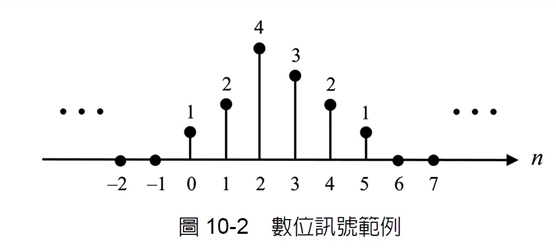
</div>

### Example 4.
Given a discrete sigal function $x[n]=(0.5)^n u[n]$, please find its z-transform and ROC. <br>

\begin{equation}
X(z)=Z\{ x[n] \} = \sum_{n=-\infty}^{\infty}(0.5)^n u[n]z^{-n} = \sum_{n=0}^{\infty}(0.5 z)^{-n}=\frac{1}{1-0.5z^{-1}}
\end{equation}
ROC: $|0.5z^{-1}| <1$ or $|z|>0.5$

<div>
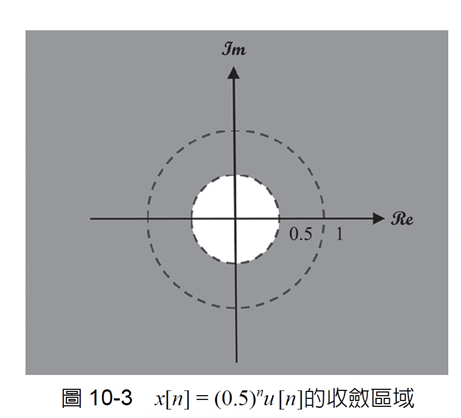
</div>

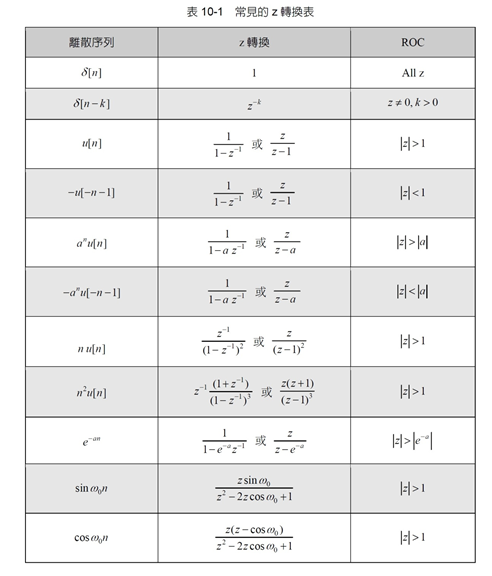

## <font color='blue'>Transfer function </font>

Consider the system block diagram of a LTI system, as shown in the following. 

\begin{equation}
H(z)= \frac{Y(z)}{X(z)}
\end{equation}

<div>
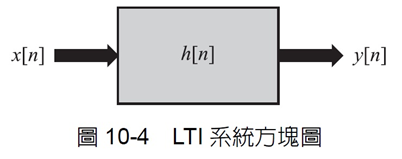
</div>

If a LTI can be denoted as follows.
\begin{equation}
H(z)= \frac{b_0+b_1 z^{-1} +...+b_M z^{-M}}{a_0+a_1 z^{-1} +...+a_N z^{-N}}
\end{equation}
Then, we can represent it as
\begin{equation}
H(z)= \frac{b_0}{a_0} z ^{N-M} \frac{\Pi_{l=1}^{M}(z-z_l)}{\Pi_{l=1}^{N}(z-p_l)}
\end{equation}
where $z=z_l, l=1,2,...,M$ are called zeros, and $z=p_l, l=1,2,...,N$ are called poles, $b_0/a_0$ is the system gain.


### Example 5.
If the transfer function of a LTI system is defined as
\begin{equation}
H(z)=\frac{1}{1-z^{-1}}
\end{equation}
Try to find its ROC, zero, and pole.

<div>
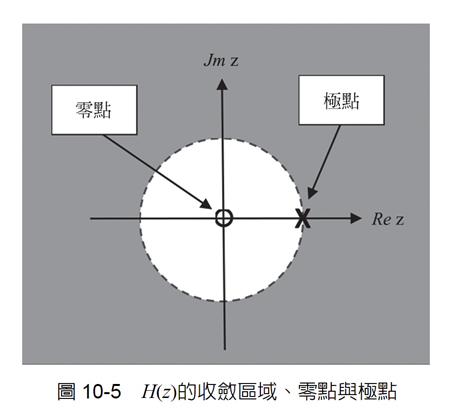
</div>

### Stability example
ex1: https://www.youtube.com/watch?v=taaisxUnE1E <br>
ex2: https://www.youtube.com/watch?v=1MeunVzResU

In [6]:
import numpy as np
import scipy.signal as signal

z = np.array( [ -0.8, 1 ] )
p = np.array( [ 0.6 + 0.8j, 0.6 - 0.8j, -1 ] )
k = 0.8

b, a = signal.zpk2tf( z, p, k )

print( "Numerator Polynomial Coefficients =", b )
print( "Denominator Polynomial Coefficients =", a )

Numerator Polynomial Coefficients = [ 0.8  -0.16 -0.64]
Denominator Polynomial Coefficients = [ 1.  -0.2 -0.2  1. ]


Zeros = [ 1.  -0.8]
Poles = [ 0.6+0.8j  0.6-0.8j -1. +0.j ]
Gain = 0.8


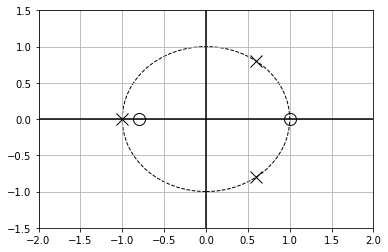

In [4]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.markers import MarkerStyle

def zplane(z, p):
	fig = plt.figure( )
	ax = plt.subplot( 1, 1, 1 )
	
	unit_circle = patches.Circle( ( 0,0 ), radius = 1, fill = False, color = 'black', ls = 'dashed' )
	ax.add_patch( unit_circle )
	plt.axvline( 0, color = 'black' )
	plt.axhline( 0, color = 'black' )
	plt.xlim( ( -2, 2 ) )
	plt.ylim( ( -1.5, 1.5 ) )
	plt.grid( )

	plt.plot( z.real, z.imag, 'ko', fillstyle = 'none', ms = 12 )
	plt.plot( p.real, p.imag, 'kx', fillstyle = 'none', ms = 12 )
	return fig

def main( ):
	b = np.array( [ 0.8, -0.16, -0.64 ] )
	a = np.array( [ 1, -0.2, -0.2, 1 ] )

	z, p, k = signal.tf2zpk( b, a )

	print( "Zeros =", z )
	print( "Poles =", p )
	print( "Gain =", k )

	zplane( z, p )
	plt.show( )
	
main( )

## <font color='blue'>Inverse z Transform</font>

The Inverse z Transform can be defined as follows.

\begin{equation}
x[n]=Z^{-1}\{ X(z) \} = \frac{1}{2\pi j}\int_{c} X(z)z^{n-1}dz   
\end{equation} 
實際反z轉換過程中，通常採用下列方式： <br>
(1)  長除法(Long Division Method)。<br>
(2)  部份分式展開法(Partial Fraction Expansion Method)。<br>
(3)  餘數法(Residue Method)。<br>

### Example 6. (Long Division Method)
If a transfer function is 
\begin{equation}
X(z)=\frac{1+z^{-1}+2z^{-2}-z^{-3}+3z^{-4}}{1-z^{-1}+z^{-2}}
\end{equation}
Try to find its inverse Z transform.

Sol:
\begin{equation}
X(z)=\frac{1+z^{-1}+2z^{-2}-z^{-3}+3z^{-4}}{1-z^{-1}+z^{-2}} = 1+2z^{-1}+3z^{-2}
\end{equation}
Therefore, <br>

$x[n]=Z^{-1}\{ X(z) \} =Z^{-1}\{ 1+2z^{-1}+3z^{-2} \}=\delta[n]+2\delta[n-1]+3\delta[n-2]$ <br>

or, <br>

$x[n]={1,2,3}, n=0, 1, 2$ <br>

Hence, if a function is defined as<br>
\begin{equation}
X(z)= \frac{b_0+b_1 z^{-1} +...+b_M z^{-M}}{a_0+a_1 z^{-1} +...+a_N z^{-N}}
\end{equation}
and we can represent it as <br>

\begin{equation}
x[n]= \frac { b_n - \sum_{i=1}^{n} x[n-i]a_i} {a_0}, n=1,2,...
\end{equation}
where $x[0]=b_0/a_0$. <br>

Zeros = [-1. +1.41421356j -1. -1.41421356j  0.5+0.8660254j   0.5-0.8660254j ]
Poles = [0.5+0.8660254j 0.5-0.8660254j 0. +0.j        0. +0.j       ]
Gain = 1.0


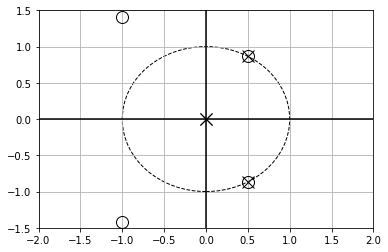

In [7]:
import numpy as np

b = np.array( [ 1, 1, 2, -1, 3 ] )
a = np.array( [ 1, -1, 1, 0, 0 ] )

z, p, k = signal.tf2zpk( b, a )

print( "Zeros =", z )
print( "Poles =", p )
print( "Gain =", k )

zplane( z, p )
plt.show( )

In [8]:
M = b.size 
N = a.size
x = np.zeros( M )
x[0] = b[0] / a[0]
for n in range( 1, M ):
	sum = 0
	k = n
	if n > N:
		k = N
	for i in range( 1, k + 1 ):
		sum = sum + x[n-i] * a[i]
	x[n] = ( b[n] - sum ) / a[0]

print( x )

[1. 2. 3. 0. 0.]


### Example 7. (Partial Fraction Expansion Method)
If a transfer function is 
\begin{equation}
X(z)=\frac{1}{1-3z^{-1}+2z^{-2}}=\frac{1}{(1-z^{-1})(1-2z^{-1})}
\end{equation}

Then, we have <br>
\begin{equation}
X(z)=\frac{1}{(1-z^{-1})(1-2z^{-1})} = \frac{-1}{(1-z^{-1})} + \frac{2}{(1-2z^{-1})}
\end{equation}

so, the discrete time sequence is <br>
\begin{equation}
x[n] =Z^{-1} \{ X(z) \} = Z^{-1} \{ \frac{-1}{(1-z^{-1})} + \frac{2}{(1-2z^{-1})} \}
     =-u[n]+2\cdot (2)^n u[n]
\end{equation}

Zeros = [0. 0.]
Poles = [2. 1.]
Gain = 1.0


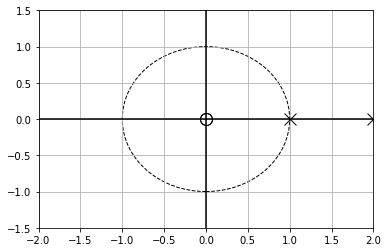

In [9]:
import numpy as np

b = np.array( [ 1, 0, 0 ] )
a = np.array( [ 1, -3, 2] )

z, p, k = signal.tf2zpk( b, a )

print( "Zeros =", z )
print( "Poles =", p )
print( "Gain =", k )

zplane( z, p )
plt.show( )

## <font color='red'> Final Problem:</font>
### Reference
https://www.youtube.com/watch?v=AU3iQSAIiPo